# Health And Safety Notebook <br> ~ Nick Usme

---

### This notebook will cover some of our findings and key takeaways when researching what makes for a good neighborhood. This particular notebook will focus on criteria that fall under the health and safety in Pittsburgh neighborhoods, more specifically crime and things of that matter.

<font size=1> *This notebook was created with the use of data taken from the 2010 Pittsburgh SNAP Census Data found on https://data.wprdc.org/dataset/pgh/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0 *</font>

In [2]:
import pandas as pd
import numpy as np
import geopandas as geo
%matplotlib inline
import matplotlib.pyplot as plt

public_safety = pd.read_csv("public_safety.csv", 
                                       index_col="Neighborhood")
public_safety

,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
Neighborhood,,,,,,,,,,,,,,
Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,"2,669",92,184,73,3.4,6.9,0,0,12,9,24,12,29
West End,4,254,23,54,66,9.1,21.3,0,1,2,3,7,3,30
West Oakland,14,"2,604",82,65,80,3.1,2.5,1,1,13,4,14,8,13


---

## THEFT!

### For this stage of my analysis, I will review the number of thefts committed per nieghborhood. This will take into account reported crimes such as auto thefts, burglaries, and robberies.

-------------------------------------------------<br>First, lets check the number of burglaries per neighborhood:

In [28]:
burglaries = public_safety.groupby("Neighborhood").sum()['#Burglary (2010)']
burglaries

Neighborhood
Allegheny Center        8
Allegheny West          6
Allentown              48
Arlington              15
Arlington Heights       5
                       ..
Upper Lawrenceville    24
West End                7
West Oakland           14
Westwood               17
Windgap                 8
Name: #Burglary (2010), Length: 90, dtype: int64

-------------------------------------------------<br>Next, auto thefts:

In [29]:
auto_theft = public_safety.groupby("Neighborhood").sum()['#Auto Theft (2010)']
auto_theft

Neighborhood
Allegheny Center        5
Allegheny West          4
Allentown              11
Arlington               7
Arlington Heights       3
                       ..
Upper Lawrenceville    12
West End                3
West Oakland            8
Westwood                6
Windgap                 7
Name: #Auto Theft (2010), Length: 90, dtype: int64

-------------------------------------------------<br>Finally, robberies:

In [30]:
robbery = public_safety.groupby("Neighborhood").sum()['#Robbery (2010)']
robbery

Neighborhood
Allegheny Center        9
Allegheny West          4
Allentown              15
Arlington               8
Arlington Heights       4
                       ..
Upper Lawrenceville    12
West End                2
West Oakland           13
Westwood                1
Windgap                 4
Name: #Robbery (2010), Length: 90, dtype: int64

---

### Now, the *REALLY* cool part: graphs!

The first cool way to visualize this data is by placing it in a map. Is your neighborhood... *safe?* DUN DUN DUNNNNNNNNNNN!!!!

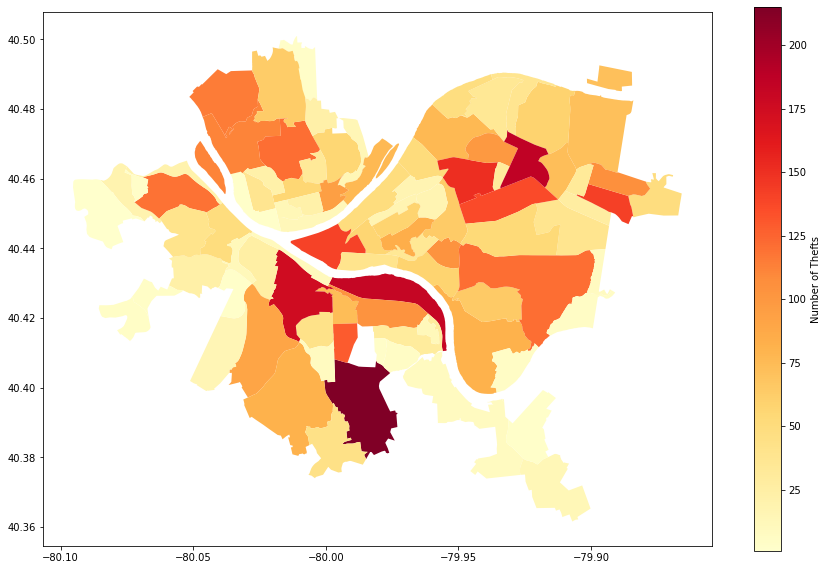

In [33]:
theft = pd.concat([burglaries, auto_theft, robbery], axis = 1, join='inner')
theft["Thefts"] = np.nan
for x in range(len(theft)):
    theft.iloc[x,3] = 0
    for y in range(3):
        theft.iloc[x,3] += theft.iloc[x,y]
theft_graph = theft.groupby("Neighborhood").sum()['Thefts']
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
theft_map = neighborhoods.merge(theft_graph, how='left', left_on='hood', right_on='Neighborhood')
theft_map.plot(column='Thefts',
                  cmap='YlOrRd',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Number of Thefts"}
                  )

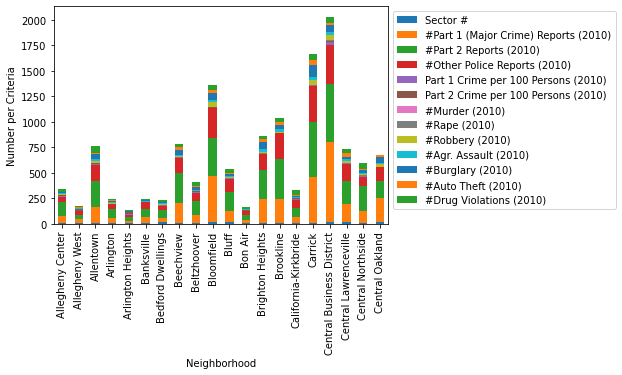

In [3]:
public_safety.head(20).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Number per Criteria")
plt.style.use('dark_background')

### The following code snippet allows us to visualize the burglaries per neighboorhood in a much easier fashion!

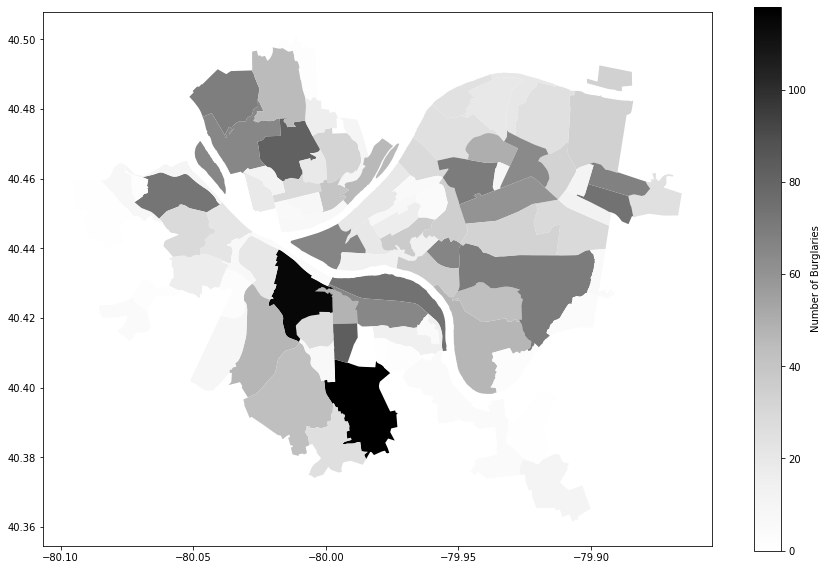

In [23]:
burgl = public_safety.groupby("Neighborhood").sum()['#Burglary (2010)']
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
burglary_map = neighborhoods.merge(burgl, how='left', left_on='hood', right_on='Neighborhood')
burglary_map.plot(column='#Burglary (2010)',
                  cmap='Greys',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Number of Burglaries"}
                  )